In [1]:
#import 
import tensorflow as tf
import numpy as np
import Normal_Distribution_Data as data
import matplotlib.pyplot as plt

In [2]:
#load input data for function
training = data.create_training_set(1000, 100) 
x_train = training[0] 
mu_train = training[1]  
alpha_train = training[2]
beta_train = training[3] 
y_train = np.vstack((mu_train, alpha_train, beta_train))
y_train = y_train.T #first column as mu, second column as alpha, third column as beta

testing = data.create_training_set(300, 100)
x_test = testing[0] 
mu_test = testing[1] 
alpha_test = testing[2] 
beta_test = testing[3] 
y_test = np.vstack((mu_test, alpha_test, beta_test))  
y_test = y_test.T



In [5]:
#set layers: label 1 model
model = tf.keras.models.Sequential() #feed forward
#input layer:
model.add(tf.keras.layers.Input(100))
#hidden layers (3):
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))   
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
#output layer:
model.add(tf.keras.layers.Dense(1,)) 


#optimize
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = [tf.keras.metrics.RootMeanSquaredError()])
model.fit(x_train, mu_train.T, epochs = 100)



Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0816 - root_mean_squared_error: 0.2856
Epoch 2/100
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0094 - root_mean_squared_error: 0.0969
Epoch 3/100
1000/1000 [==============================] - 0s 132us/sample - loss: 0.0046 - root_mean_squared_error: 0.0678
Epoch 4/100
1000/1000 [==============================] - 0s 141us/sample - loss: 0.0026 - root_mean_squared_error: 0.0513
Epoch 5/100
1000/1000 [==============================] - 0s 141us/sample - loss: 0.0011 - root_mean_squared_error: 0.0336
Epoch 6/100
1000/1000 [==============================] - 0s 140us/sample - loss: 8.3080e-04 - root_mean_squared_error: 0.0288
Epoch 7/100
1000/1000 [==============================] - 0s 135us/sample - loss: 3.7107e-04 - root_mean_squared_error: 0.0193
Epoch 8/100
1000/1000 [==============================] - 0s 135us/sample - loss: 2.4924e-04 - root_mean_squared_error:

In [6]:
#evaluate the test set and find test loss and accuracy
results = model.evaluate(x = x_test, y = mu_test)
val_loss = results[0] 
val_acc = results[1] 
print(val_loss, val_acc)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

3.647397386278802e-05 0.0060393685


In [7]:
#set layers: label 2 model
model2 = tf.keras.models.Sequential() #feed forward
#input layer: 100 different x values to represent the gaussian function
model2.add(tf.keras.layers.Input(100))
#hidden layers (3):
model2.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))   
model2.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
#output layer:
model2.add(tf.keras.layers.Dense(1,))


#optimize
model2.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = [tf.keras.metrics.RootMeanSquaredError()])
model2.fit(x_train, alpha_train.T, epochs = 100)



Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 904us/sample - loss: 0.6128 - root_mean_squared_error: 0.7828
Epoch 2/100
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0483 - root_mean_squared_error: 0.2199
Epoch 3/100
1000/1000 [==============================] - 0s 133us/sample - loss: 0.0084 - root_mean_squared_error: 0.0915
Epoch 4/100
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0104 - root_mean_squared_error: 0.1022
Epoch 5/100
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0041 - root_mean_squared_error: 0.0643
Epoch 6/100
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0021 - root_mean_squared_error: 0.0462
Epoch 7/100
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0014 - root_mean_squared_error: 0.0371
Epoch 8/100
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0015 - root_mean_squared_error: 0.0387
Ep

In [12]:
#evaluate the test set and find test loss and accuracy
results = model2.evaluate(x = x_test, y = alpha_test)
val_loss = results[0]
val_acc = results[1] 
print(val_loss, val_acc)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0001598198296657453 0.012641987


In [10]:
#set layers: label 3 model
model3 = tf.keras.models.Sequential() #feed forward
#input layer: 100 different x values to represent the function
model3.add(tf.keras.layers.Input(100))
#hidden layers (3):
model3.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))   
model3.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model3.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))

#output layer:
model3.add(tf.keras.layers.Dense(1,))


#optimize
model3.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = [tf.keras.metrics.RootMeanSquaredError()])
model3.fit(x_train, beta_train.T, epochs = 100)



Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 999us/sample - loss: 1.2035 - root_mean_squared_error: 1.0970
Epoch 2/100
1000/1000 [==============================] - 0s 131us/sample - loss: 0.2639 - root_mean_squared_error: 0.5137
Epoch 3/100
1000/1000 [==============================] - 0s 128us/sample - loss: 0.1531 - root_mean_squared_error: 0.3913
Epoch 4/100
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0405 - root_mean_squared_error: 0.2012
Epoch 5/100
1000/1000 [==============================] - 0s 136us/sample - loss: 0.0119 - root_mean_squared_error: 0.1089
Epoch 6/100
1000/1000 [==============================] - 0s 132us/sample - loss: 0.0070 - root_mean_squared_error: 0.0839
Epoch 7/100
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0070 - root_mean_squared_error: 0.0837
Epoch 8/100
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0028 - root_mean_squared_error: 0.0525
Ep

In [13]:
#evaluate the test set and find test loss and accuracy
results = model3.evaluate(x = x_test, y = beta_test)
val_loss = results[0]
val_acc = results[1] 
print(val_loss, val_acc)


300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0008467815156715611 0.029099511


In [25]:
#saves the model data
model.save('gn_mu.model')
new_model = tf.keras.models.load_model('gn_mu.model')
model2.save('gn_alpha.model')
new_model2 = tf.keras.models.load_model('gn_alpha.model')
model3.save('gn_beta.model')
new_model3 = tf.keras.models.load_model('gn_beta.model')


INFO:tensorflow:Assets written to: gn_mu.model/assets
INFO:tensorflow:Assets written to: gn_alpha.model/assets
INFO:tensorflow:Assets written to: gn_beta.model/assets


In [26]:
#makes predictions for all elements in x_test array  
predictions_mu = new_model.predict(x_test)
predictions_alpha = new_model2.predict(x_test) 
predictions_beta = new_model3.predict(x_test) 

In [27]:
predictions_mu = predictions_mu.T
predictions_alpha = predictions_alpha.T
predictions_beta = predictions_beta.T
y_test = y_test.T

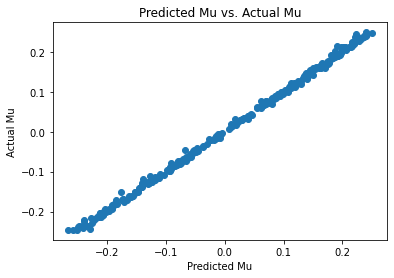

In [29]:
plt.scatter(predictions_mu,mu_test) #Mu: predictions vs. actual value scatter plot
plt.title('Predicted Mu vs. Actual Mu')
plt.xlabel('Predicted Mu')
plt.ylabel('Actual Mu')
plt.show() 

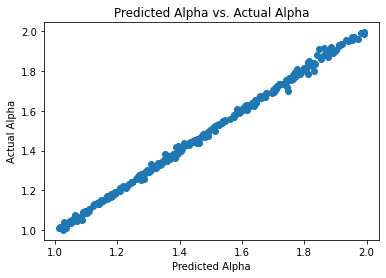

In [30]:
plt.scatter(predictions_alpha,alpha_test) #Alpha: predictions vs. actual value scatter plot
plt.title('Predicted Alpha vs. Actual Alpha')
plt.xlabel('Predicted Alpha')
plt.ylabel('Actual Alpha')
plt.show()

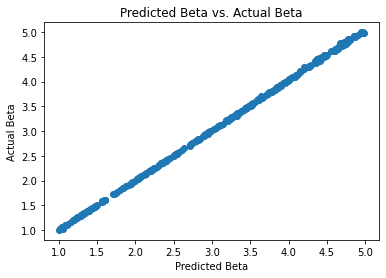

In [31]:
plt.scatter(predictions_beta,beta_test) #Beta: predictions vs. actual value scatter plot
plt.title('Predicted Beta vs. Actual Beta')
plt.xlabel('Predicted Beta')
plt.ylabel('Actual Beta')
plt.show()

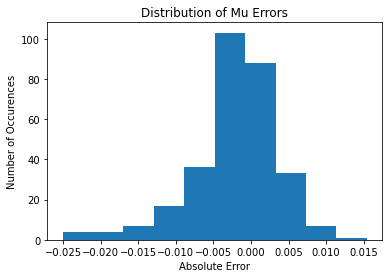

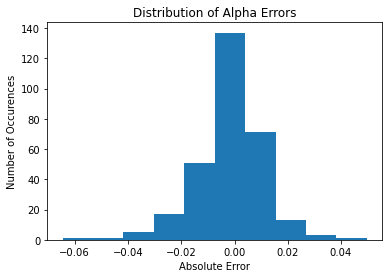

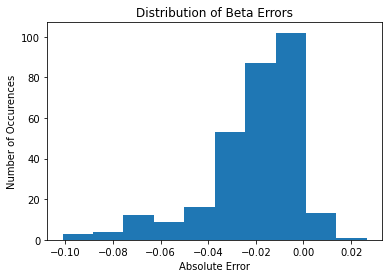

In [44]:
#histogram representation of absolute errors between prediction and actual values for each label 
plt.hist(predictions_mu.T.flatten()-mu_test)
plt.title('Distribution of Mu Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()

plt.hist(predictions_alpha.T.flatten()-alpha_test)
plt.title('Distribution of Alpha Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Absolute Error') 
plt.show() 

plt.hist(predictions_beta.T.flatten()-beta_test)
plt.title('Distribution of Beta Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Absolute Error') 
plt.show() 